customer churn prediction analysis for DEPI
team members:


1- Michael Mohab Soltan Nashed (leader)
eng.michaelsoltan@gmail.com
21077122

2- Hazem Mohamed Salem
Hazem.mohamedsm@gmail.com
21041541

3- Marwan Ahmed Salah Ahmed  
 marwanshehata328@gmail.com  
21083763

4- Kareem moataz mostafa mohamed elmahdy
Kareemmoataz16@gmail.com
21049214

5- Ibrahim emam mahmoud
Ibrahimelnogomy7@gmail.com
21000650

6- Mohamed tawfik hossam el din
Mohammed_20230458@fci.helwan.edu.eg
21093334



# Loading Dataset from kagglehub



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data preparation and preporcessing

In [ ]:
# Load the dataset
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# === EXPLORATORY DATA ANALYSIS ===
print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: \n {df.shape}")
print(f"\nColumns: \n {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 rows: \n ")
display(df.head())


=== DATASET OVERVIEW ===
Dataset Shape: 
 (7043, 21)

Columns: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: obj

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# casting TotalCharges from object to float

In [ ]:
# Dropping CustomerID since it will not be used
df = df.drop(columns=['customerID'])

# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df = df.drop_duplicates()


In [ ]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# checking for outliers.

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")



tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


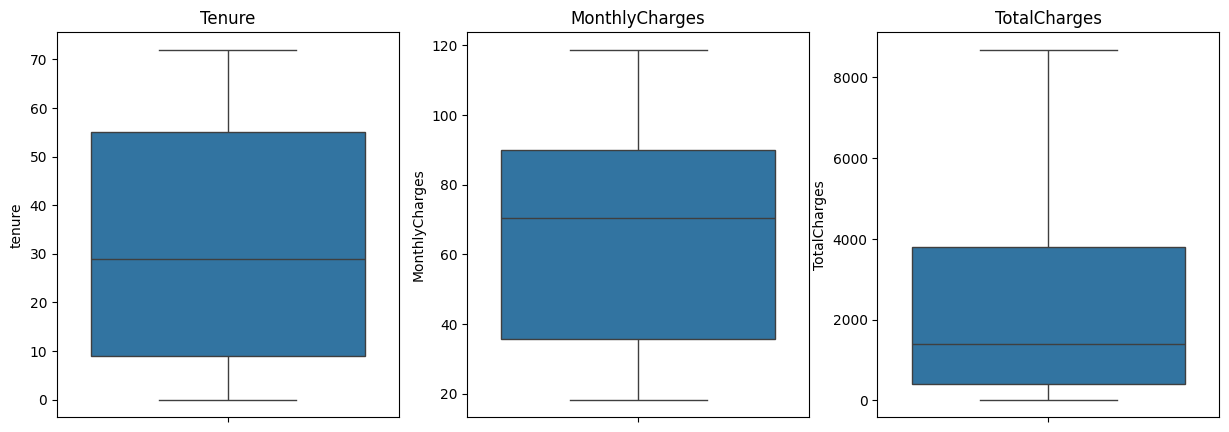

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(y=df['tenure'], ax=axes[0])
sns.boxplot(y=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(y=df['TotalCharges'], ax=axes[2])
axes[0].set_title("Tenure")
axes[1].set_title("MonthlyCharges")
axes[2].set_title("TotalCharges")
plt.show()


# Discriptive Analysis

=== CHURN DISTRIBUTION ===


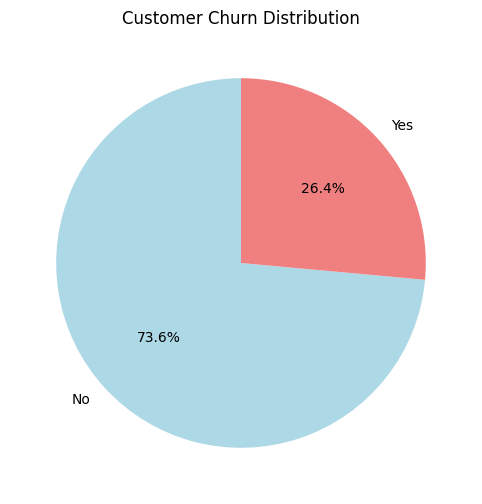

Churn Rate: 26.4%
Non-Churn: 5164 customers
Churn: 1857 customers


/tmp/ipython-input-370309333.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churn Rate: {(churn_counts[1]/len(df))*100:.1f}%")
/tmp/ipython-input-370309333.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Non-Churn: {churn_counts[0]} customers")
/tmp/ipython-input-370309333.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churn: {churn_counts[1]} customers")


In [ ]:
# === 1. CHURN DISTRIBUTION PIE CHART ===
print("=== CHURN DISTRIBUTION ===")
plt.figure(figsize=(10, 6))
churn_counts = df['Churn'].value_counts()

labels = ['No', 'Yes']

plt.pie(churn_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Customer Churn Distribution')
plt.show()

print(f"Churn Rate: {(churn_counts[1]/len(df))*100:.1f}%")
print(f"Non-Churn: {churn_counts[0]} customers")
print(f"Churn: {churn_counts[1]} customers")

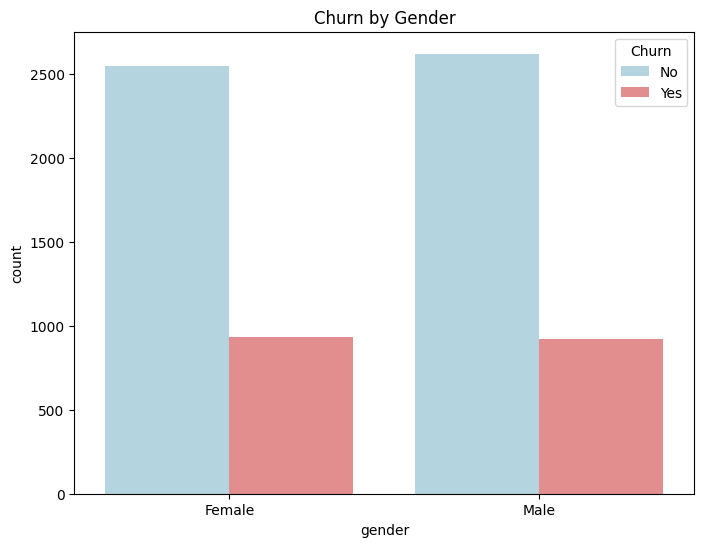

In [ ]:
# === 2. GENDER VS CHURN ===
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Gender')
plt.show()

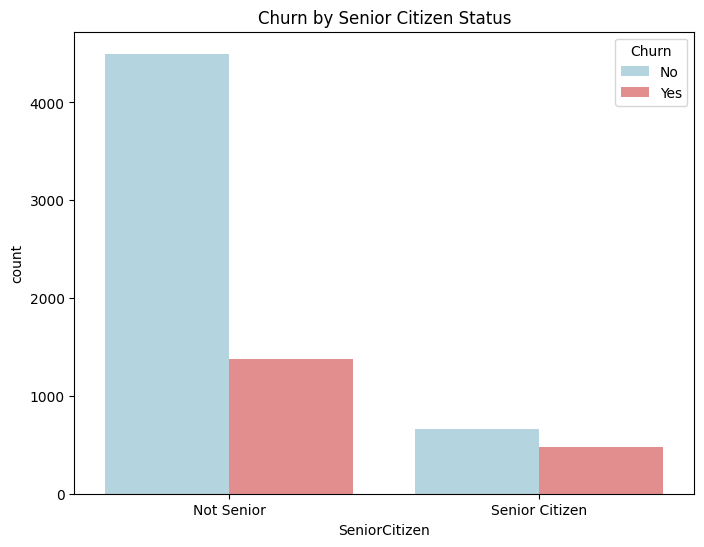

In [ ]:
# === 3. SENIOR CITIZEN VS CHURN ===
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.xticks(ticks=[0, 1], labels=['Not Senior', 'Senior Citizen'])
plt.title('Churn by Senior Citizen Status')
plt.show()

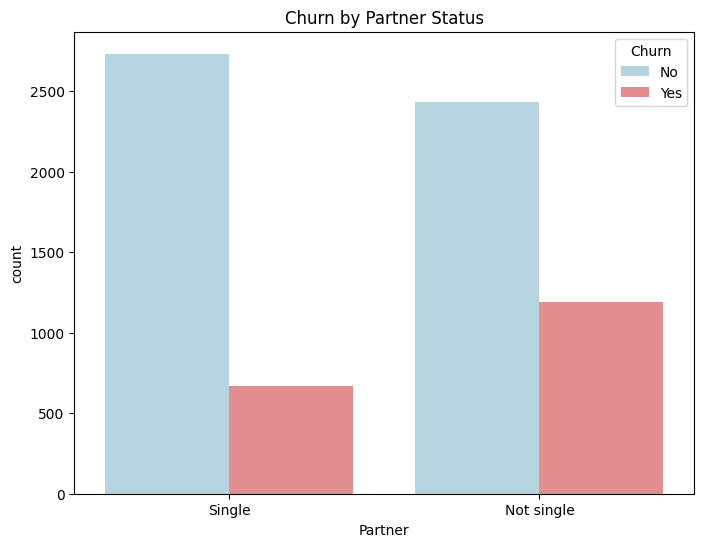

In [ ]:
# === 4. PARTNER STATUS VS CHURN ===
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Partner', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.xticks(ticks=[0, 1], labels=['Single', 'Not single'])
plt.title('Churn by Partner Status')
plt.show()

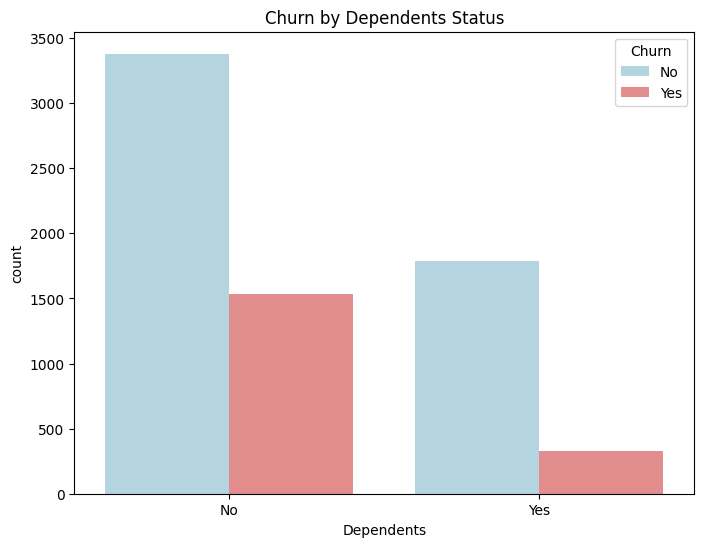

In [ ]:
# === 5. DEPENDENTS VS CHURN ===
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dependents', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Dependents Status')
plt.show()

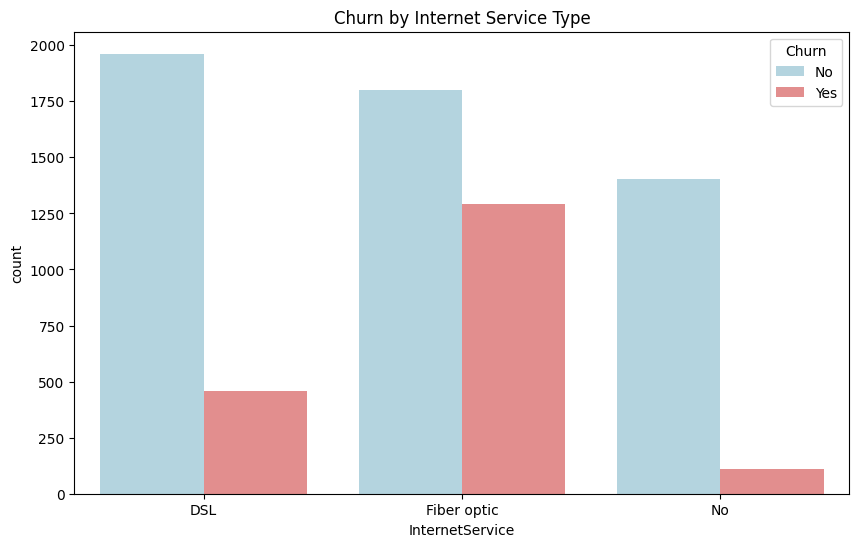

In [ ]:
# === 6. INTERNET SERVICE VS CHURN ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Internet Service Type')
plt.show()

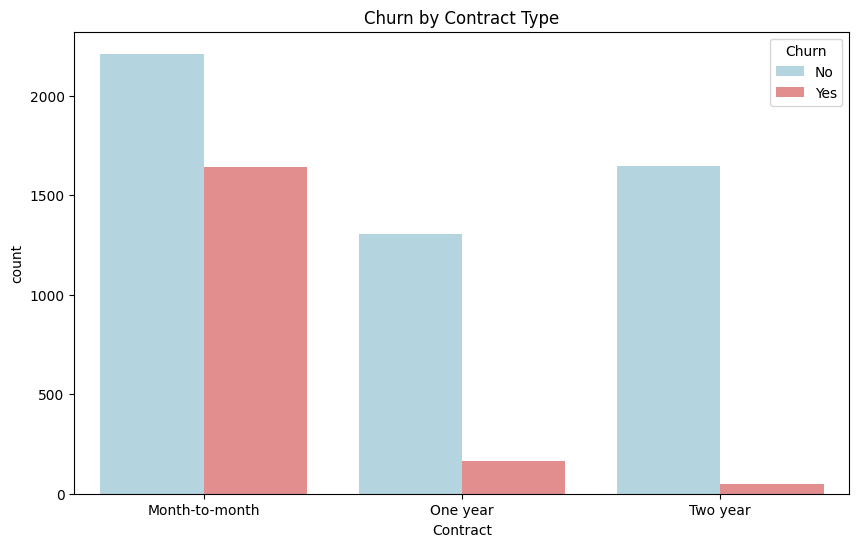

In [ ]:
# === 7. CONTRACT TYPE VS CHURN ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Contract Type')
plt.show()

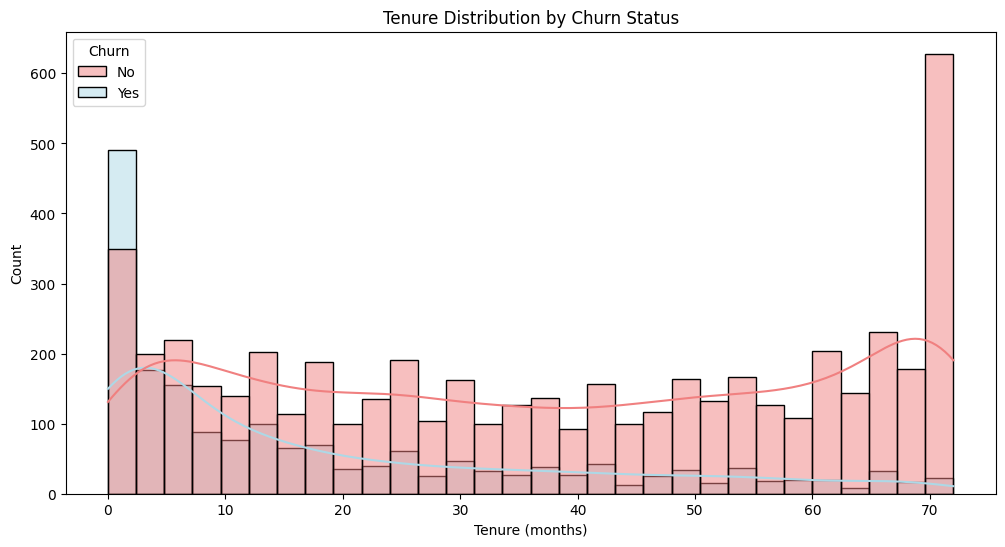

In [ ]:
# === 9. TENURE DISTRIBUTION BY CHURN ===
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, palette=['lightcoral','lightblue'])
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (months)')
plt.show()

/tmp/ipython-input-431960456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['lightblue', 'lightcoral'])


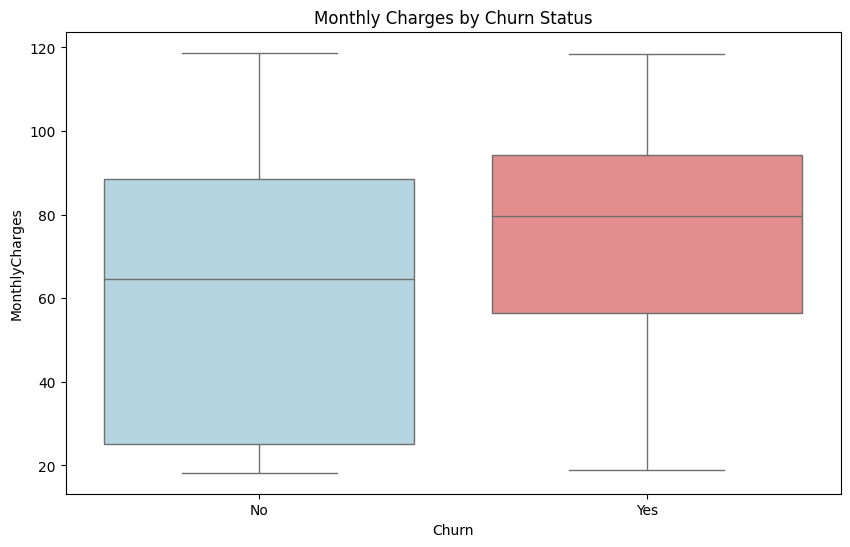

In [ ]:
# === 10. MONTHLY CHARGES BY CHURN ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['lightblue', 'lightcoral'])
plt.title('Monthly Charges by Churn Status')
plt.show()

/tmp/ipython-input-1410876182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y='TotalCharges', palette=['lightblue', 'lightcoral'])


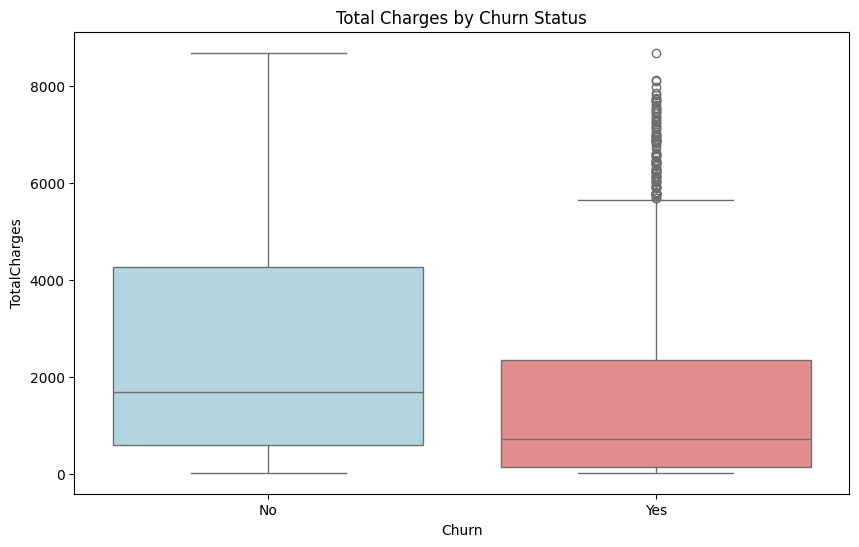

In [ ]:
# === 11. TOTAL CHARGES BY CHURN ===
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean = df.dropna(subset=['TotalCharges'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Churn', y='TotalCharges', palette=['lightblue', 'lightcoral'])
plt.title('Total Charges by Churn Status')
plt.show()

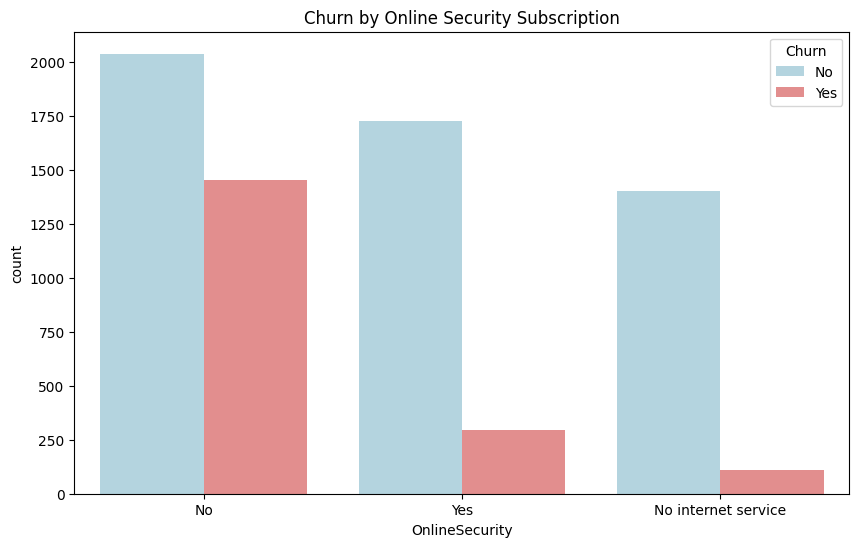

In [ ]:
# === 12. ONLINE SECURITY VS CHURN ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Online Security Subscription')
plt.show()

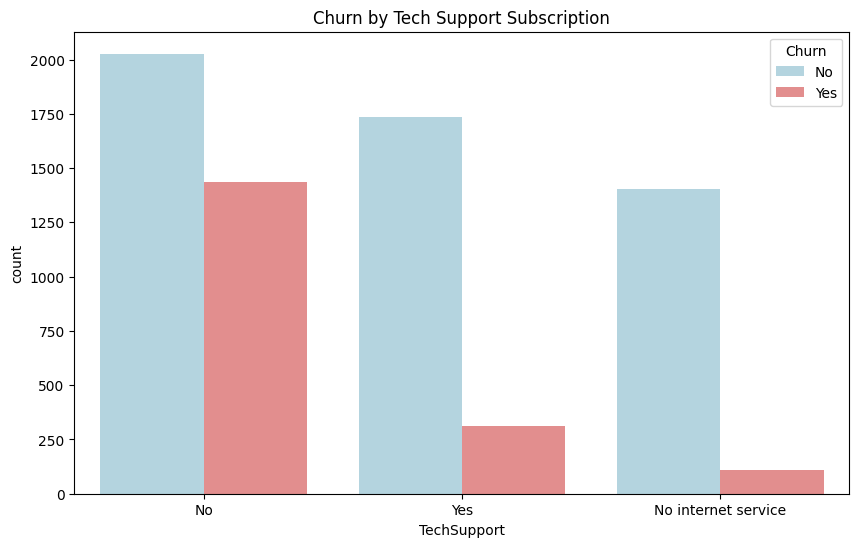

In [ ]:
# === 13. TECH SUPPORT VS CHURN ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Tech Support Subscription')
plt.show()

In [ ]:
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

# Encoding getting data Ready for ML

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(df["Churn"].value_counts())

Churn
0    5164
1    1857
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [ ]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [ ]:
object_columns = df.select_dtypes(include="object").columns
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

# dont use label encoding
!!!!!!!!

In [ ]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

# splitting to train and test.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=["Churn"])
Y = df["Churn"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(Y_train.value_counts())

Churn
0    4111
1    1505
Name: count, dtype: int64


as we observe there is an extreme unbalance in the data!!!. to solve that we use Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
print(Y_train_smote.value_counts())

Churn
1    4111
0    4111
Name: count, dtype: int64


# Model training


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

In [ ]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.70820669, 0.70881459, 0.85097324, 0.82420925, 0.84428224]),
 'Random Forest': array([0.74346505, 0.76960486, 0.89781022, 0.89476886, 0.90389294])}

as we observe Random Forest is better.

Training

In [ ]:
UsedModel= RandomForestClassifier(random_state=42)
UsedModel.fit(X_train_smote, Y_train_smote)

RandomForestClassifier(random_state=42)

Testing

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
Y_test_pred = UsedModel.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, Y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))

Accuracy Score:
 0.7651245551601423
Confsuion Matrix:
 [[874 179]
 [151 201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1053
           1       0.53      0.57      0.55       352

    accuracy                           0.77      1405
   macro avg       0.69      0.70      0.70      1405
weighted avg       0.77      0.77      0.77      1405



Lets save the model and encoders

In [ ]:
import pickle
model_data = {"model": UsedModel, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [ ]:
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

Load the data.

In [ ]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.drop(columns=['customerID'])

In [ ]:
# Randomly select one row from your dataframe
random_slide_data_df = df.sample(n=1, random_state=42)
X_Sample= random_slide_data_df.drop(columns=["Churn"])
Y_Sample= random_slide_data_df["Churn"]
print(X_Sample)
print(Y_Sample)

     gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
185  Female              0     Yes         No       1           No   

        MultipleLines InternetService OnlineSecurity OnlineBackup  \
185  No phone service             DSL             No           No   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
185               No          No          No              No  Month-to-month   

    PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges  
185              Yes  Electronic check            24.8         24.8  
185    Yes
Name: Churn, dtype: object


In [ ]:
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:

# Load the encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in X_Sample.columns:
        X_Sample[column] = encoder.transform(X_Sample[column])
Y_Sample = Y_Sample.map({'Yes': 1, 'No': 0})


In [ ]:
print(X_Sample)
print(Y_Sample)

     gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185       0              0        1           0       1             0   

     MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
185              1                0               0             0   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
185                 0            0            0                0         0   

     PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  
185                 1              2            24.8         24.8  
185    1
Name: Churn, dtype: int64


In [ ]:

# Make a prediction
prediction = loaded_model.predict(X_Sample)
pred_prob = loaded_model.predict_proba(X_Sample)

# Results
print("Selected input data:")
print(X_Sample)
print("\n--- Prediction Results ---")
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'} actual value is {'Churn' if Y_Sample.iloc[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

Selected input data:
     gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185       0              0        1           0       1             0   

     MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
185              1                0               0             0   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
185                 0            0            0                0         0   

     PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  
185                 1              2            24.8         24.8  

--- Prediction Results ---
Prediction: Churn actual value is Churn
Prediction Probability: [[0.26 0.74]]


In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Assuming your model is called `rf_model`
# and was trained like rf_model = RandomForestClassifier(...).fit(X_train, y_train)

# Export one tree (e.g., the first one)
tree = loaded_model.estimators_[0]

dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=loaded_model.classes_.astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # saves it as PDF

'random_forest_tree.pdf'

# INSIGNTS FROM INSTRUCTOR
1- dont use Label encoder even its decumentation says to only use it in the Y not X

2- under graphs put insights

3- dont use SMOTE

4- why use fillna median. it would be better to use worse case because its worse for customer to churn when model says he wont churn

5- dont put useless grapths. it must be removed

# todays session we got production and deplyment
